## 线性回归简介

在数据科学和机器学习领域，线性回归是一种**最基本、最常用**的算法。

它用于建模变量与目标之间的线性关系，帮助我们<font color=red>预测和解释数据中的线性模式</font>。

本篇文章将讲解线性回归的理论、实现和应用示例。

## 线性回归的基本概念

### 数学表达

线性回归的核心思想是找到一个<font color=red>最佳拟合直线</font>，使得输入变量$X$和输出变量$Y$之间的关系最接近以下线性方程：

$$
Y = \beta_0 + \beta_1 X + \epsilon
$$

其中$X$为特征变量（自变量），$Y$为目标变量（因变量）。$\beta_0$为截距，$\beta_1$为斜率，

$\epsilon$为误差项，表示观测数据和线性模型的偏差。

### 目标

最小化误差：通过最小化均方误差(MSE)，来找到最佳的$\beta_0$和$\beta_1$。

## 线性回归的实现

接下来，将使用 NumPy 和 scikit-learn 来手动实现线性回归。

### 数据集生成

首先，生成一个简单的模拟数据集，数据集中的$X$和$Y$具有线性关系并加入一些随机噪声。


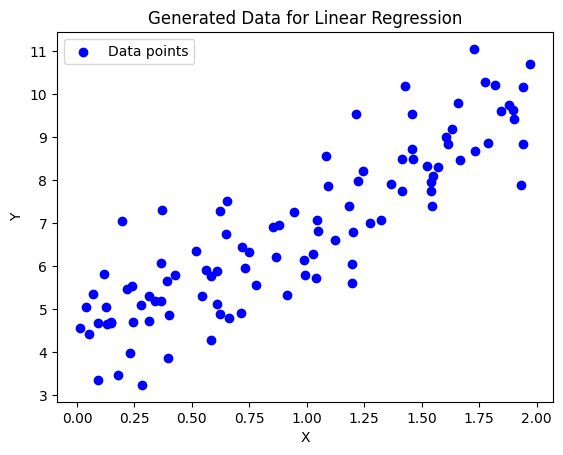

In [9]:
# 导入必要的库
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 生成数据
np.random.seed(42)  # 保持可复现性
X = 2 * np.random.rand(100, 1)  # 生成 100 个随机点 (0, 2) 范围内的自变量
y = 4 + 3 * X + np.random.randn(100, 1)  # 线性方程：y = 4 + 3x + 噪声

# 可视化数据
plt.scatter(X, y, color='blue', label='Data points')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Generated Data for Linear Regression")
plt.legend()
plt.show()


上述散点图，展示了$X$和$Y$的关系。可观察到数据的分布大致呈线性趋势。

### 手动实现线性回归 (最小二乘法)

使用 NumPy 来实现线性回归，计算系数$\beta_0$和$\beta_1$。

In [10]:
# 1. 计算线性回归的系数 (最小二乘法)
X_b = np.c_[np.ones((100, 1)), X]  # 增加一列 1 (偏置项)
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)  # 正规方程解

# 2. 提取截距和斜率
beta_0, beta_1 = theta_best[0][0], theta_best[1][0]
print(f"拟合方程：Y = {beta_0:.2f} + {beta_1:.2f}X")


拟合方程：Y = 4.22 + 2.77X


### 使用 scikit-learn 实现线性回归

更常见的做法是使用 scikit-learn 库的 LinearRegression 模块来实现。

In [11]:

from sklearn.linear_model import LinearRegression

# 1. 创建线性回归模型并进行拟合
lin_reg = LinearRegression()
lin_reg.fit(X, y)  # 训练模型

# 2. 提取截距和斜率
beta_0_sklearn = lin_reg.intercept_[0]
beta_1_sklearn = lin_reg.coef_[0][0]
print(f"scikit-learn 拟合方程：Y = {beta_0_sklearn:.2f} + {beta_1_sklearn:.2f}X")

scikit-learn 拟合方程：Y = 4.22 + 2.77X


### 结果可视化

将拟合的回归线绘制到数据点上，以观察模型的效果。

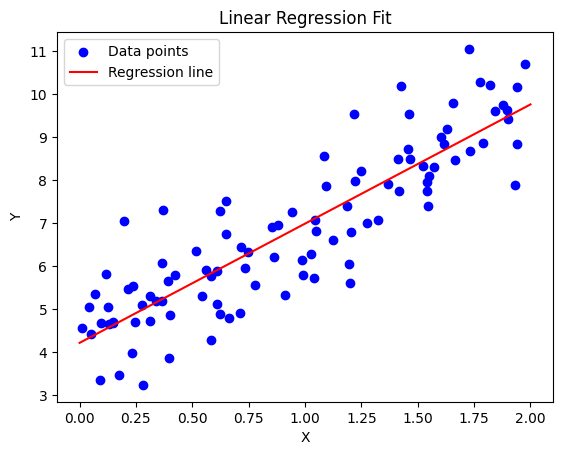

In [12]:
# 1. 预测 y 值
X_new = np.array([[0], [2]])  # 在 (0, 2) 区间内绘制直线
y_pred = lin_reg.predict(X_new)  # 预测的 Y 值

# 2. 可视化回归线
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X_new, y_pred, color='red', label='Regression line')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Linear Regression Fit")
plt.legend()
plt.show()

## 线性回归的应用场景

### 预测分析

- 房价预测：基于房屋面积预测房价。
- 销售预测：根据广告支出、销售额等变量预测未来销售。

### 解释变量关系
- 教育与收入的关系：探索受教育年限与收入的关系。
- 温度与能耗的关系：根据气温变化，预测电力使用量。

## 线性回归的性能评估

线性回归模型的性能评估通常使用以下几种指标：

1. 均方误差 (MSE)：表示预测值与真实值的平方误差的平均值。

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2
$$
￼
1. 均方根误差 (RMSE)：是 MSE 的平方根，具有与目标变量相同的单位

$$
\text{RMSE} = \sqrt{\text{MSE}}

$$
￼
3. R 方 (R², 决定系数)：表示模型对总方差的解释程度，范围在 0 到 1 之间，越接近 1 代表模型的解释能力越强。
	
$$
R^2 = 1 - \frac{\sum_{i=1}^n (y_i - \hat{y}i)^2}{\sum{i=1}^n (y_i - \bar{y})^2}
$$

## 扩展和改进
- 多元线性回归：当输入变量$X$是多维向量时，线性回归方程变为如下形式，使得我们可以建模多个特征变量之间的关系。
￼
$$
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_n X_n + \epsilon
$$

- 正则化 (Lasso 和 Ridge 回归)：当数据中存在多重共线性时，L1（Lasso）和 L2（Ridge）正则化可以有效防止过拟合。

## 总结

1.	线性回归的核心思想是通过最小化误差来拟合数据集的线性关系。
2.	我们展示了从零实现线性回归的过程，并使用了 scikit-learn 来简化实现。
3.	线性回归的应用范围广泛，包括销售预测、金融分析等领域。
4.	可以通过MSE、RMSE 和 ￼ 来评估线性回归模型的性能。